In [151]:
%reload_ext nb_black
%run Functions_13-06.ipynb

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [152]:
import os

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [153]:
a_directory = "C:/Users/Asus/Desktop/Repo/MasterThesis_RI/Sample_18_06/"

# Significant Columns

significant_columns = ["col_0", "col_1"]

my_dataframes_acc = []
my_dataframes_rej = []
my_dataframes_comb = []
for filename in os.listdir(a_directory):
    filepath = os.path.join(a_directory)
    dfr_dev_with_label, dfr_test_with_label, a, r, r_dev, r_test = data_preprocessing(
        filename, "is_selected", "y", 0.8
    )
    X_res, y_res = create_X_y(a)
    X_train, X_test, y_train, y_test = split(X_res, y_res)
    dfr_test_with_label_X = dfr_test_with_label.loc[
        :, dfr_test_with_label.columns != "y"
    ]
    dfr_test_with_label_y = dfr_test_with_label.loc[
        :, dfr_test_with_label.columns == "y"
    ]

    # Calculate Default Rates
    dr = len(y_test[y_test["target"] == 1]) / (
        len(y_test[y_test["target"] == 1]) + len(y_test[y_test["target"] == 0])
    )
    conservative_dr = (
        1.25
        * len(y_test[y_test["target"] == 1])
        / (len(y_test[y_test["target"] == 1]) + len(y_test[y_test["target"] == 0]))
    )

    KGB_new = train_ssl()
    KGB1 = train_one_iter()

    # 1. Before RI
    pred_test_a = evaluate_test_accepts(KGB1, X_test)
    pred_test_r = evaluate_test_rejects(KGB1, r_test)
    pred_test_combined = evaluate_test_combined(KGB1, X_test, r_test)

    pred_test_a["Flag"] = pred_test_a.apply(flag_df_baseline, axis=1)
    predictions_accepts_beforeRI = [round(kickout_baseline(pred_test_a).tolist(), 3)]

    pred_test_r["Flag"] = pred_test_r.apply(flag_df_baseline, axis=1)
    predictions_rejects_beforeRI = [round(kickout_baseline(pred_test_r).tolist(), 3)]

    pred_test_combined["Flag"] = pred_test_combined.apply(flag_df_baseline, axis=1)
    predictions_combined_beforeRI = [
        round(kickout_baseline(pred_test_combined).tolist(), 3)
    ]

    # 2. Baseline
    KGB_baseline_new = predict_rejects(KGB1, r_dev)
    pred_test_a = evaluate_test_accepts(KGB_baseline_new, X_test)
    pred_test_r = evaluate_test_rejects(KGB_baseline_new, r_test)
    pred_test_combined = evaluate_test_combined(KGB_baseline_new, X_test, r_test)
    f1_simple_aug, auc_simple_aug = standard_evaluation(pred_test_combined)
    f1_simple_aug_new = castToList(round(f1_simple_aug, 3))
    auc_simple_aug_new = castToList(round(auc_simple_aug, 3))

    pred_test_a["Flag"] = pred_test_a.apply(flag_df_baseline, axis=1)
    predictions_accepts_base = [round(kickout_baseline(pred_test_a).tolist(), 3)]

    pred_test_r["Flag"] = pred_test_r.apply(flag_df_baseline, axis=1)
    predictions_rejects_base = [round(kickout_baseline(pred_test_r).tolist(), 3)]

    pred_test_combined["Flag"] = pred_test_combined.apply(flag_df_baseline, axis=1)
    predictions_combined_base = [
        round(kickout_baseline(pred_test_combined).tolist(), 3)
    ]

    # 3. Best Iteration

    pred_test_a = evaluate_test_accepts(KGB_new, X_test)
    pred_test_r = evaluate_test_rejects(KGB_new, r_test)
    pred_test_combined = evaluate_test_combined(KGB_new, X_test, r_test)

    pred_test_a["Flag"] = pred_test_a.apply(flag_df_baseline, axis=1)
    predictions_accepts_iter = [round(kickout_baseline(pred_test_a).tolist(), 3)]

    pred_test_r["Flag"] = pred_test_r.apply(flag_df_baseline, axis=1)
    predictions_rejects_iter = [round(kickout_baseline(pred_test_r).tolist(), 3)]

    pred_test_combined["Flag"] = pred_test_combined.apply(flag_df_baseline, axis=1)
    predictions_combined_iter = [
        round(kickout_baseline(pred_test_combined).tolist(), 3)
    ]

    # 4. New Model

    KGB_baseline_new = predict_rejects(KGB_new, r_dev)
    pred_test_a = evaluate_test_accepts(KGB_baseline_new, X_test)
    pred_test_r = evaluate_test_rejects(KGB_baseline_new, r_test)
    pred_test_combined = evaluate_test_combined(KGB_baseline_new, X_test, r_test)
    f1_simple_aug_st, auc_simple_aug_st = standard_evaluation(pred_test_combined)
    f1_simple_aug_st_new = castToList(round(f1_simple_aug_st, 3))
    auc_simple_aug_st_new = castToList(round(auc_simple_aug_st, 3))

    pred_test_a["Flag"] = pred_test_a.apply(flag_df_baseline, axis=1)
    predictions_accepts_new = [round(kickout_baseline(pred_test_a).tolist(), 3)]

    pred_test_r["Flag"] = pred_test_r.apply(flag_df_baseline, axis=1)
    predictions_rejects_new = [round(kickout_baseline(pred_test_r).tolist(), 3)]

    pred_test_combined["Flag"] = pred_test_combined.apply(flag_df_baseline, axis=1)
    predictions_combined_new = [round(kickout_baseline(pred_test_combined).tolist(), 3)]

    # Combine Predictions

    new_filename = filename[:-4]

    my_list_accepts = [
        # predictions_accepts_beforeRI,
        predictions_accepts_base,
        # predictions_accepts_iter,
        predictions_accepts_new,
        f1_simple_aug_new,
        f1_simple_aug_st_new,
        auc_simple_aug_new,
        auc_simple_aug_st_new
        # predictions_accepts_rand_parc,
    ]

    df_pred_accepts = pd.DataFrame(my_list_accepts).transpose()
    df_pred_accepts = df_pred_accepts.rename(
        columns={
            # 0: "Before RI",
            0: "Simple Augmentation",
            # 2: "Iteration n",
            1: "Simple Augmentation + Self-Training",
            # 4: "Rand Parcelling",
            2: "F1 Simple Augmentation",
            3: "F1 Simple Aug + ST",
            4: "AUC Simple Augmentation",
            5: "AUC Simple Aug + ST",
        },
        index={0: new_filename},
    )

    my_dataframes_acc.append(df_pred_accepts)

    my_list_rejects = [
        # predictions_rejects_beforeRI,
        predictions_rejects_base,
        # predictions_rejects_iter,
        predictions_rejects_new,
        f1_simple_aug_new,
        f1_simple_aug_st_new,
        auc_simple_aug_new,
        auc_simple_aug_st_new
        # predictions_rejects_rand_parc,
    ]
    df_pred_rejects = pd.DataFrame(my_list_rejects).transpose()
    df_pred_rejects = df_pred_rejects.rename(
        columns={
            # 0: "Before RI",
            0: "Simple Augmentation",
            # 2: "Iteration n",
            1: "Simple Augmentation + Self-Training",
            # 4: "Rand Parcelling",
            2: "F1 Simple Augmentation",
            3: "F1 Simple Aug + ST",
            4: "AUC Simple Augmentation",
            5: "AUC Simple Aug + ST",
        },
        index={0: new_filename},
    )

    my_dataframes_rej.append(df_pred_rejects)

    my_list_combined = [
        # predictions_combined_beforeRI,
        predictions_combined_base,
        # predictions_combined_iter,
        predictions_combined_new,
        f1_simple_aug_new,
        f1_simple_aug_st_new,
        auc_simple_aug_new,
        auc_simple_aug_st_new
        # predictions_accepts_rand_parc,
    ]
    df_pred_combined = pd.DataFrame(my_list_combined).transpose()
    df_pred_combined = df_pred_combined.rename(
        columns={
            # 0: "Before RI",
            0: "Simple Augmentation",
            # 2: "Iteration n",
            1: "Simple Augmentation + Self-Training",
            # 4: "Rand Parcelling",
            2: "F1 Simple Augmentation",
            3: "F1 Simple Aug + ST",
            4: "AUC Simple Augmentation",
            5: "AUC Simple Aug + ST",
        },
        index={0: new_filename},
    )

    my_dataframes_comb.append(df_pred_combined)
df_results_acc = pd.concat(my_dataframes_acc, axis=0)
df_results_rej = pd.concat(my_dataframes_rej, axis=0)
df_results_comb = pd.concat(my_dataframes_comb, axis=0)

Iteration Nr 1
1600
1528
Iteration Nr 2
1600
1453
Iteration Nr 3
1600
1403
Iteration Nr 4
1600
1333
Iteration Nr 5
1600
1268
Iteration Nr 6
1600
1204
Iteration Nr 7
1600
1143
Iteration Nr 8
1600
1086
Iteration Nr 1
3200
3054
Iteration Nr 2
3200
2945
Iteration Nr 3
3200
2787
Iteration Nr 4
3200
2634
Iteration Nr 5
3200
2505
Iteration Nr 6
3200
2387
Iteration Nr 7
3200
2277
Iteration Nr 8
3200
2173
Iteration Nr 1
1600
1524
Iteration Nr 2
1600
1457
Iteration Nr 3
1600
1377
Iteration Nr 4
1600
1322
Iteration Nr 5
1600
1289
Iteration Nr 6
1600
1224
Iteration Nr 7
1600
1182
Iteration Nr 8
1600
1125
Iteration Nr 9
1600
1074
Iteration Nr 1
3200
3041
Iteration Nr 2
3200
2900
Iteration Nr 3
3200
2785
Iteration Nr 4
3200
2667
Iteration Nr 5
3200
2553
Iteration Nr 6
3200
2427
Iteration Nr 7
3200
2297
Iteration Nr 8
3200
2209
Iteration Nr 1
1600
1456
Iteration Nr 2
1600
1329
Iteration Nr 3
1600
1205
Iteration Nr 4
1600
1141
Iteration Nr 5
1600
1096
Iteration Nr 1
1600
1468
Iteration Nr 2
1600
1380


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### Random Forest Results

In [154]:
df_results_comb

,Simple Augmentation,Simple Augmentation + Self-Training,F1 Simple Augmentation,F1 Simple Aug + ST,AUC Simple Augmentation,AUC Simple Aug + ST
linear_05dr_10rr,0.861,0.878,0.284,0.361,0.612,0.648
linear_05dr_20rr,0.879,0.896,0.209,0.324,0.570,0.617
linear_10dr_10rr,0.775,0.812,0.352,0.456,0.636,0.688
linear_10dr_20rr,0.773,0.816,0.345,0.467,0.625,0.682
moon_05dr_10rr,0.881,0.876,0.232,0.211,0.582,0.573
moon_10dr_10rr,0.787,0.786,0.367,0.365,0.640,0.639
moon_10dr_20rr,0.772,0.780,0.200,0.225,0.555,0.565
semicircle_05dr_10rr,0.872,0.873,0.399,0.399,0.684,0.682
semicircle_05dr_20rr,0.854,0.874,0.285,0.374,0.618,0.660
semicircle_10dr_10rr,0.776,0.790,0.468,0.496,0.709,0.724


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [155]:
df_results_rej

,Simple Augmentation,Simple Augmentation + Self-Training,F1 Simple Augmentation,F1 Simple Aug + ST,AUC Simple Augmentation,AUC Simple Aug + ST
linear_05dr_10rr,0.510,0.470,0.284,0.361,0.612,0.648
linear_05dr_20rr,0.667,0.643,0.209,0.324,0.570,0.617
linear_10dr_10rr,0.250,0.360,0.352,0.456,0.636,0.688
linear_10dr_20rr,0.473,0.480,0.345,0.467,0.625,0.682
moon_05dr_10rr,0.440,0.400,0.232,0.211,0.582,0.573
moon_10dr_10rr,0.120,0.115,0.367,0.365,0.640,0.639
moon_10dr_20rr,0.255,0.225,0.200,0.225,0.555,0.565
semicircle_05dr_10rr,0.695,0.705,0.399,0.399,0.684,0.682
semicircle_05dr_20rr,0.732,0.728,0.285,0.374,0.618,0.660
semicircle_10dr_10rr,0.475,0.465,0.468,0.496,0.709,0.724


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [156]:
df_results_acc

,Simple Augmentation,Simple Augmentation + Self-Training,F1 Simple Augmentation,F1 Simple Aug + ST,AUC Simple Augmentation,AUC Simple Aug + ST
linear_05dr_10rr,0.899,0.905,0.284,0.361,0.612,0.648
linear_05dr_20rr,0.933,0.937,0.209,0.324,0.570,0.617
linear_10dr_10rr,0.833,0.839,0.352,0.456,0.636,0.688
linear_10dr_20rr,0.846,0.845,0.345,0.467,0.625,0.682
moon_05dr_10rr,0.928,0.926,0.232,0.211,0.582,0.573
moon_10dr_10rr,0.862,0.856,0.367,0.365,0.640,0.639
moon_10dr_20rr,0.902,0.907,0.200,0.225,0.555,0.565
semicircle_05dr_10rr,0.892,0.887,0.399,0.399,0.684,0.682
semicircle_05dr_20rr,0.881,0.888,0.285,0.374,0.618,0.660
semicircle_10dr_10rr,0.812,0.807,0.468,0.496,0.709,0.724


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# 10DR 10RR

## Linear

In [ ]:
# textstr = "\n".join(("Figure 1", "DR = 10%", "RR = 10%", "Eval. full sample"))
# props = dict(boxstyle="round", facecolor="wheat", alpha=0.5)
# plt.text(0.05, 0.95, textstr, fontsize=10, verticalalignment="bottom", bbox=props)

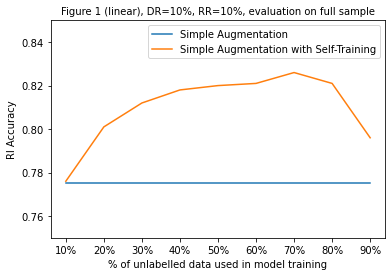

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [284]:
augmentation = 9 * [0.775]
linear_comb_st = [0.776, 0.801, 0.812, 0.818, 0.820, 0.821, 0.826, 0.821, 0.796]
plt.ylim(0.75, 0.85)
plt.title("Figure 1 (linear), DR=10%, RR=10%, evaluation on full sample", fontsize=10)
plt.plot(augmentation, label="Simple Augmentation")
plt.plot(linear_comb_st, label="Simple Augmentation with Self-Training")
locs, labels = xticks()
xticks(np.arange(9), ["10%", "20%", "30%", "40%", "50%", "60%", "70%", "80%", "90%"])
xlabel("% of unlabelled data used in model training")
ylabel("RI Accuracy")
plt.legend()
plt.savefig(
    r"C:\Users\Asus\Desktop\Repo\MasterThesis_RI\Results\10dr_10rr_linear_combined.png"
)
plt.show()

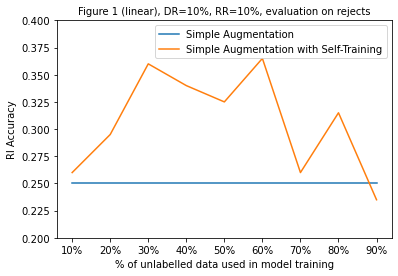

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [292]:
augmentation = 9 * [0.250]
linear_rej_st = [0.260, 0.295, 0.36, 0.34, 0.325, 0.365, 0.26, 0.315, 0.235]
plt.ylim(0.2, 0.4)
plt.title("Figure 1 (linear), DR=10%, RR=10%, evaluation on rejects", fontsize=10)
plt.plot(augmentation, label="Simple Augmentation")
plt.plot(linear_rej_st, label="Simple Augmentation with Self-Training")
locs, labels = xticks()
xticks(np.arange(9), ["10%", "20%", "30%", "40%", "50%", "60%", "70%", "80%", "90%"])
xlabel("% of unlabelled data used in model training")
ylabel("RI Accuracy")
plt.legend()
plt.savefig(
    r"C:\Users\Asus\Desktop\Repo\MasterThesis_RI\Results\10dr_10rr_linear_rejects.png"
)
plt.show()

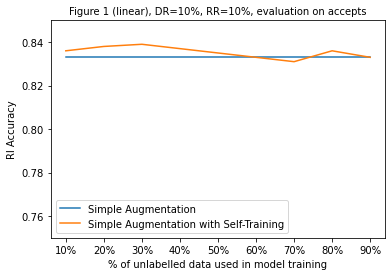

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [286]:
linear_acc_st = [0.836, 0.838, 0.839, 0.837, 0.835, 0.833, 0.831, 0.836, 0.833]
augmentation = 9 * [0.833]
plt.ylim(0.75, 0.85)
plt.title("Figure 1 (linear), DR=10%, RR=10%, evaluation on accepts", fontsize=10)
plt.plot(augmentation, label="Simple Augmentation")
plt.plot(linear_acc_st, label="Simple Augmentation with Self-Training")
locs, labels = xticks()
xticks(np.arange(9), ["10%", "20%", "30%", "40%", "50%", "60%", "70%", "80%", "90%"])
xlabel("% of unlabelled data used in model training")
ylabel("RI Accuracy")
plt.legend()
plt.savefig(
    r"C:\Users\Asus\Desktop\Repo\MasterThesis_RI\Results\10dr_10rr_linear_accepts.png"
)
plt.show()

## Semi

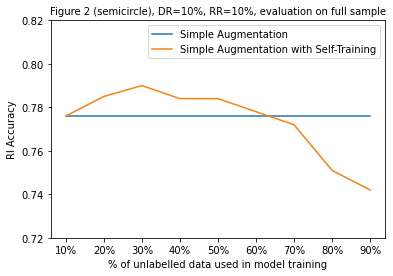

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [287]:
semi_comb_st = [0.776, 0.785, 0.790, 0.784, 0.784, 0.778, 0.772, 0.751, 0.742]
augmentation = 9 * [0.776]
plt.ylim(0.72, 0.82)
plt.title(
    "Figure 2 (semicircle), DR=10%, RR=10%, evaluation on full sample", fontsize=10
)
plt.plot(augmentation, label="Simple Augmentation")
plt.plot(semi_comb_st, label="Simple Augmentation with Self-Training")
locs, labels = xticks()
xticks(np.arange(9), ["10%", "20%", "30%", "40%", "50%", "60%", "70%", "80%", "90%"])
xlabel("% of unlabelled data used in model training")
ylabel("RI Accuracy")
plt.legend()
plt.savefig(
    r"C:\Users\Asus\Desktop\Repo\MasterThesis_RI\Results\10dr_10rr_semi_combined.png"
)
plt.show()

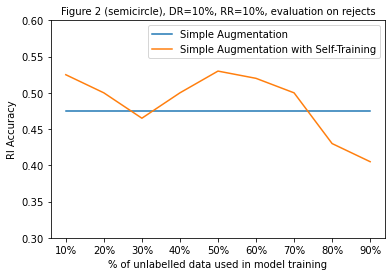

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [291]:
semi_rej_st = [0.525, 0.50, 0.465, 0.50, 0.530, 0.520, 0.50, 0.430, 0.405]
augmentation = 9 * [0.475]
plt.ylim(0.30, 0.60)
plt.title("Figure 2 (semicircle), DR=10%, RR=10%, evaluation on rejects", fontsize=10)
plt.plot(augmentation, label="Simple Augmentation")
plt.plot(semi_rej_st, label="Simple Augmentation with Self-Training")
locs, labels = xticks()
xticks(np.arange(9), ["10%", "20%", "30%", "40%", "50%", "60%", "70%", "80%", "90%"])
xlabel("% of unlabelled data used in model training")
ylabel("RI Accuracy")
plt.legend()
plt.savefig(
    r"C:\Users\Asus\Desktop\Repo\MasterThesis_RI\Results\10dr_10rr_semi_rejects.png"
)
plt.show()

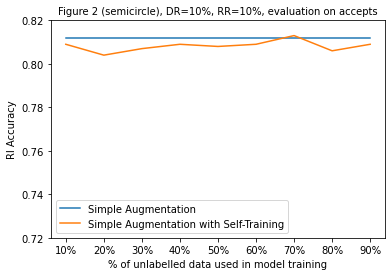

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [290]:
semi_acc_st = [0.809, 0.804, 0.807, 0.809, 0.808, 0.809, 0.813, 0.806, 0.809]
augmentation = 9 * [0.812]
plt.ylim(0.72, 0.82)
plt.title("Figure 2 (semicircle), DR=10%, RR=10%, evaluation on accepts", fontsize=10)
plt.plot(augmentation, label="Simple Augmentation")
plt.plot(semi_acc_st, label="Simple Augmentation with Self-Training")
locs, labels = xticks()
xticks(np.arange(9), ["10%", "20%", "30%", "40%", "50%", "60%", "70%", "80%", "90%"])
xlabel("% of unlabelled data used in model training")
ylabel("RI Accuracy")
plt.legend()
plt.savefig(
    r"C:\Users\Asus\Desktop\Repo\MasterThesis_RI\Results\10dr_10rr_semi_accepts.png"
)
plt.show()

## Moon

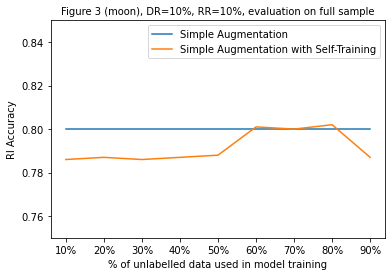

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [359]:
augmentation = 9 * [0.8]
moon_comb_st = [0.786, 0.787, 0.786, 0.787, 0.788, 0.801, 0.8, 0.802, 0.787]
plt.ylim(0.75, 0.85)
plt.title("Figure 3 (moon), DR=10%, RR=10%, evaluation on full sample", fontsize=10)
plt.plot(augmentation, label="Simple Augmentation")
plt.plot(moon_comb_st, label="Simple Augmentation with Self-Training")
locs, labels = xticks()
xticks(np.arange(9), ["10%", "20%", "30%", "40%", "50%", "60%", "70%", "80%", "90%"])
xlabel("% of unlabelled data used in model training")
ylabel("RI Accuracy")
plt.legend()
plt.savefig(
    r"C:\Users\Asus\Desktop\Repo\MasterThesis_RI\Results\10dr_10rr_moon_combined.png"
)
plt.show()

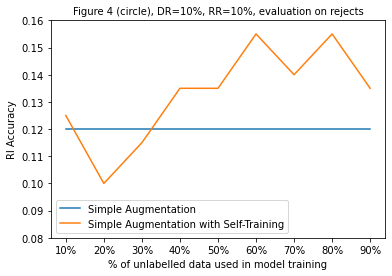

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [362]:
augmentation = 9 * [0.120]
moon_rej_st = [0.125, 0.1, 0.115, 0.135, 0.135, 0.155, 0.14, 0.155, 0.135]
plt.ylim(0.08, 0.16)
plt.title("Figure 4 (circle), DR=10%, RR=10%, evaluation on rejects", fontsize=10)
plt.plot(augmentation, label="Simple Augmentation")
plt.plot(moon_rej_st, label="Simple Augmentation with Self-Training")
locs, labels = xticks()
xticks(np.arange(9), ["10%", "20%", "30%", "40%", "50%", "60%", "70%", "80%", "90%"])
xlabel("% of unlabelled data used in model training")
ylabel("RI Accuracy")
plt.legend()
plt.savefig(
    r"C:\Users\Asus\Desktop\Repo\MasterThesis_RI\Results\10dr_10rr_moon_rejects.png"
)
plt.show()

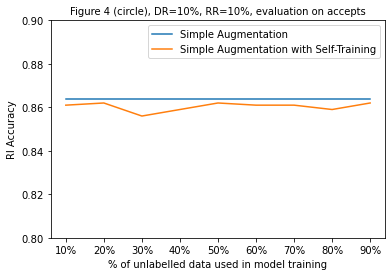

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [363]:
augmentation = 9 * [0.864]
moon_acc_st = [0.861, 0.862, 0.856, 0.859, 0.862, 0.861, 0.861, 0.859, 0.862]
plt.ylim(0.8, 0.9)
plt.title("Figure 4 (circle), DR=10%, RR=10%, evaluation on accepts", fontsize=10)
plt.plot(augmentation, label="Simple Augmentation")
plt.plot(moon_acc_st, label="Simple Augmentation with Self-Training")
locs, labels = xticks()
xticks(np.arange(9), ["10%", "20%", "30%", "40%", "50%", "60%", "70%", "80%", "90%"])
xlabel("% of unlabelled data used in model training")
ylabel("RI Accuracy")
plt.legend()
plt.savefig(
    r"C:\Users\Asus\Desktop\Repo\MasterThesis_RI\Results\10dr_10rr_moon_accepts.png"
)
plt.show()

## Circle

In [ ]:
augmentation = 9 * [ 0.787]
circle_comb_st = []
plt.ylim(0.75, 0.85)
plt.title("Figure 4 (circle), DR=10%, RR=10%, evaluation on full sample", fontsize=10)
plt.plot(augmentation, label="Simple Augmentation")
plt.plot(circle_comb_st, label="Simple Augmentation with Self-Training")
locs, labels = xticks()
xticks(np.arange(9), ["10%", "20%", "30%", "40%", "50%", "60%", "70%", "80%", "90%"])
xlabel("% of unlabelled data used in model training")
ylabel("RI Accuracy")
plt.legend()
plt.savefig(
    r"C:\Users\Asus\Desktop\Repo\MasterThesis_RI\Results\10dr_10rr_circle_combined.png"
)
plt.show()